In [591]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [592]:
df = pd.read_csv('avgTemp.csv')
# remove the "Year" and "City" columns
df = df.drop(['Year', 'City', 'Day'], axis=1)
# if Day_of_year is 366, remove the row
df = df[df.Day_of_Year != 366]
# only keep first 265 rows

df = df.dropna() # drop missing values
df

,AvgTemp,Day_of_Year
0,-0.4,1
1,-1.1,2
2,-7.9,3
3,-5.1,4
4,-4.2,5
...,...,...
9126,-1.1,361
9127,-3.2,362
9128,2.6,363
9129,8.2,364


PLOT TEMP AND ROW NUMBER

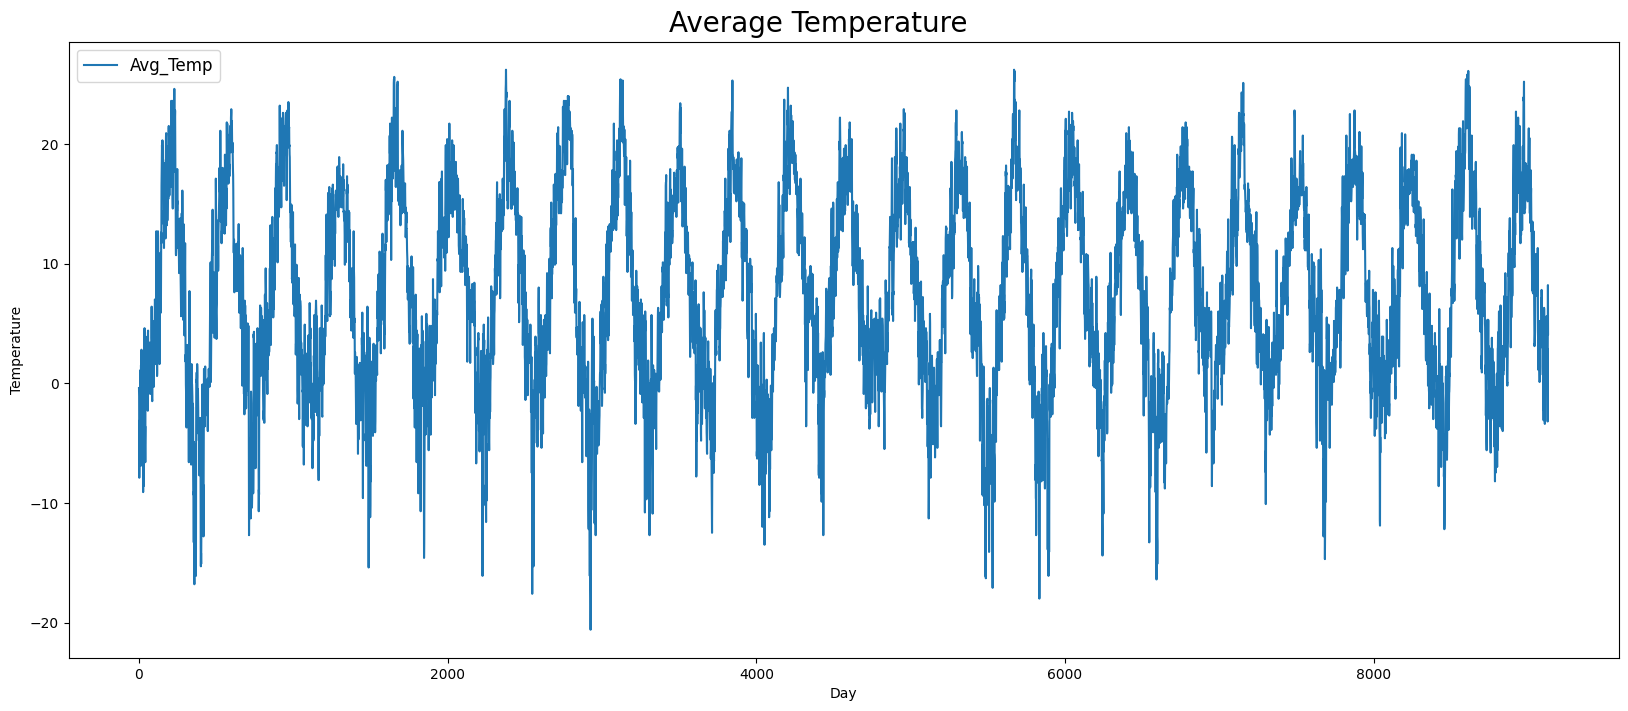

In [593]:
fig = plt.figure(figsize=(20, 8)) 
st = fig.suptitle("Average Temperature", fontsize=20)
st.set_y(0.92) 

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['AvgTemp'], label='Avg_Temp')
ax1.set_xlabel('Day')
ax1.set_ylabel('Temperature')
ax1.legend(loc="upper left", fontsize=12)



NORMALIZE DELTA PERCENTAGE

In [594]:
'''Calculate percentage change'''

# Convert Celsius to Kelvin
df['AvgTemp'] = df['AvgTemp'] + 273.15


df





,AvgTemp,Day_of_Year
0,272.75,1
1,272.05,2
2,265.25,3
3,268.05,4
4,268.95,5
...,...,...
9126,272.05,361
9127,269.95,362
9128,275.75,363
9129,281.35,364


In [595]:






###############################################################################
'''Create indexes to split dataset'''

times = sorted(df.index.values) # get the times as integers
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # get the last 10% of the times
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # get the last 20% of the times
#print min value of avgTemp
print(df['AvgTemp'].min())
print(df['AvgTemp'].max())

###############################################################################
'''Normalize avgtemp column'''
min_avgtemp = df[(df.index < last_20pct)]['AvgTemp'].min()
max_avgtemp = df[(df.index < last_20pct)]['AvgTemp'].max()
min_avgtemp, max_avgtemp


# Min-max normalization
df['AvgTemp'] = (df['AvgTemp'] - min_avgtemp) / (max_avgtemp - min_avgtemp)



252.54999999999998
299.34999999999997


In [596]:


df
# save to csv as avgTemp2.csv




,AvgTemp,Day_of_Year
0,0.431624,1
1,0.416667,2
2,0.271368,3
3,0.331197,4
4,0.350427,5
...,...,...
9126,0.416667,361
9127,0.371795,362
9128,0.495726,363
9129,0.615385,364


In [597]:
# show me row 9006
df.iloc[9000:9010]

,AvgTemp,Day_of_Year
9006,0.869658,241
9007,0.807692,242
9008,0.835470,243
9009,0.878205,244
9010,0.779915,245
9011,0.756410,246
9012,0.743590,247
9013,0.773504,248
9014,0.726496,249
9015,0.732906,250
